# MATH 405/607 

# Numerical Methods for Differential Equations

[[Instructor: Christoph Ortner]](http://www.math.ubc.ca/~ortner/)  [[course page]](https://github.com/cortner/math405_2022)


## Spectral Methods 1 - Approximation

* Approximation with Trigonometric Polynomials
* Paley-Wiener Theorem
* Exponental approximation rates
* Trigonometric Interpolant

### Literature

* N Trefethen, Spectral Methods in Matlab [[html]](https://people.maths.ox.ac.uk/trefethen/spectral.html)
* https://people.maths.ox.ac.uk/trefethen/pdetext.html, Ch. 7

In [1]:
include("math405.jl")

┌ Info: You are not running in the `math405` Jupyter Hub environment. 
│ I'm therefore activating the local environment.
│ Make sure you know what you are doing! If this is unintentional 
│ then get in touch with your instructor to get help.
└ @ Main /Users/ortner/gits/math405_2022/notes/math405.jl:7
  Activating project at `~/gits/math405_2022/notes`


### Motivation: Trapezoidal Rule 

We will integrate two functions over $[-\pi, \pi]$, using the composite trapezoidal rule:
$$
f_1(x) = \frac{1}{1+x^2}, \qquad f_2(x) = \frac{1}{1 + \sin^2(x)}
$$

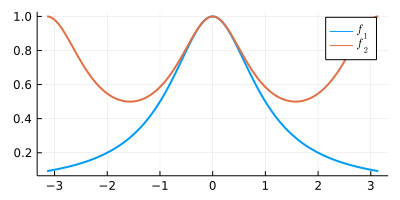

In [2]:
f1(x) = 1 / (1 + x^2); f2(x) = 1 / (1 + sin(x)^2); a, b = -π, π
plot(f1, a, b, lw=2, label = L"f_1", size = (400, 200))
plot!(f2, a, b, lw=2, label = L"f_2")

In [3]:
function trapezoidal_rule(f, a, b, N)
    x = range(a; stop=b, length=N+1)   # linspace(a, b, N+1)
    h = (b-a)/N
    return h * sum( f.(x) ) - h/2 * (f(a)+f(b)) 
end ;


In [4]:
# convergence of trapezoidal rule for f1
for N in [10, 20, 30, 40, 50]
    @show trapezoidal_rule(f1, a, b, N)
end

trapezoidal_rule(f1, a, b, N) = 2.5220610282723337
trapezoidal_rule(f1, a, b, N) = 2.52438103082414
trapezoidal_rule(f1, a, b, N) = 2.5248659739797823
trapezoidal_rule(f1, a, b, N) = 2.5250358962597037
trapezoidal_rule(f1, a, b, N) = 2.52511457906189


In [5]:
# convergence of trapezoidal rule for f2
for N in [10, 20, 30, 40, 50]
    @show trapezoidal_rule(f2, a, b, N)
end


trapezoidal_rule(f2, a, b, N) = 4.44420424166361
trapezoidal_rule(f2, a, b, N) = 4.442883134576314
trapezoidal_rule(f2, a, b, N) = 4.4428829381875685
trapezoidal_rule(f2, a, b, N) = 4.4428829381583705
trapezoidal_rule(f2, a, b, N) = 4.442882938158366


A proper convergence test: what is going on here?

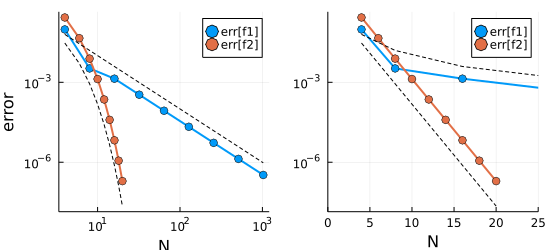

In [6]:
# data for error of integral f1
NN1 = (2).^(2:10); I_f1 = 2 * atan(pi)
err_f1 = [ abs(trapezoidal_rule(f1, a, b, N) - I_f1)  for N in NN1 ]
# data for error of integral f2
NN2 = 4:2:20; I_f2 = pi*sqrt(2)
err_f2 = [ abs(trapezoidal_rule(f2, a, b, N) - I_f2)  for N in NN2 ]
# plot the convergence both on a log-log and and a lin-log axis
P0 = plot(NN1, err_f1, lw=2, m=:o, label = "err[f1]", xlabel = "N")
plot!(P0, NN2, err_f2, lw=2, m=:o, label = "err[f2]")
plot!(P0, NN1, NN1.^(-2), lw=1, ls=:dash, c=:black, label = "")
plot!(P0, NN2, exp.(-0.88*NN2), lw=1, ls=:dash, c=:black, label = "")
plot( plot!(deepcopy(P0), xaxis = (:log,), yaxis = (:log,), ylabel = "error"), plot!(P0, xlims = [0, 25], yaxis = (:log,)), size = (550, 250) ) 

### Fourier Series

It turns out the periodicity of $f_2$ is crucial. And the way to see this is via Fourier series!

If $f : \mathbb{R} \to \mathbb{R}$ is continuous and $2\pi$-periodic then 
$$\begin{aligned}
    f(x) &= \sum_{k \in \mathbb{Z}} \hat{f}_k e^{ikx} , \qquad \text{where}  \\
      \hat{f}_k &= \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) e^{-ikx} dx.
\end{aligned}$$

The decay of the Fourier coefficients $|\hat{f}_k|$ as $|k| \to \infty$ determine the convergence. See assignment A5.

### Approximation with Trigonometric Polynomials

Let the $N$-the partial sum is given by 
$$
    S_N f(x) := \sum_{k = -N}^N \hat{f}_k e^{ikx}
$$
Then 
$$
    \| f - S_N f\|_\infty \leq \sum_{|k| > N} |\hat{f}_k|
$$
so again the decay of $\hat{f}_k$ plays a fundamental role.

### Paley Wiener Theorem 

**Theorem:** Let $f$ be $2\pi$-periodic and analytic in the strip $\Omega_{\bar\alpha} := \{ z : |{\rm Re}z| < \bar\alpha \}$ where $\bar\alpha > 0$, then for all $\alpha < \bar\alpha$ 
$$
    |\hat{f}_k| \leq M_\alpha e^{- \alpha |k|},
$$
where $M_\alpha = \max_{z \in \Omega_\alpha} |f(z)|$.

**Corollary: Exponential Convergence** Let $f$ be $2\pi$-periodic and analytic in the strip $\Omega_{\bar\alpha}$ then
$$
    \| f - S_N f \|_\infty \lesssim M_\alpha e^{-\alpha N} 
$$
for all $\alpha < \bar\alpha$.

E.g., 
$$
    f(z) = \frac{1}{1 + \sin^2(z)}
$$
    has a singularity at $z = \pm i \sinh^{-1}(1)$ (i.e., where $1 + \sin^2(z) = 0$). I.e. the maximal region of analyticity is $\Omega_\alpha$ with $\alpha = \sinh^{-1}(1) \approx 0.88$.

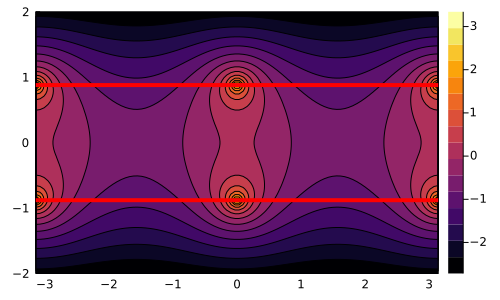

In [7]:
x = range(-pi, pi, length=100); y = range(-2, 2, length=100);
X = ones(length(y)) * x'; Y = y * ones(length(x))'
ffun = z -> 1 / (1 + sin(z)^2)
contourf(x, y, log.(abs.(ffun.(X + im * Y))))
hline!([-0.88, 0.88], lw=4, c=:red, label = "", size = (500, 300))

### Trigonometric Interpolant and the Discrete Fourier Transform

The $N$th partial sum $S_N f$ is not convenient to evaluate. A more practical concept is the trigonometric interpolant:

The trigonometric interpolant of degree $N$ is defined by 
$$\begin{aligned}
    I_N f(x) &= {\rm Re}\bigg[ \sum_{k = -N+1}^N \hat{F}_k e^{i k x} \bigg], \\ 
    I_N f(\pi n/N) &= F_n := f(\pi n/N), \qquad n = -N+1, \dots, N.
\end{aligned}$$

**Proposition:** The trigonometric interpolant is close to optimal in the sense that 
$$
    \| f - I_N f \|_\infty \lesssim \log N \inf \| f - t_N \|_\infty,
$$
where $t_N$ ranges over all trigonometric polynomials of degree $N$. 

In [8]:
# note this is not a 1-1 translation of the math. The reason 
# is that there are multiple possible conventions for the 
# x-space and k-space grid.
using FFTW
"construct a real-space grid - use FFT convention"
xgrid(N) = range(0.0, stop=2π-2π/2N, length=2N)
"construct the reciprocal space grid assumed by `fft` - carefully use FFT convention"
kgrid(N) = [0:N; -N+1:-1]
"compute the fourier coefficients of I_N"
fouriercoeffs(f::Function, N) = fouriercoeffs(f.(xgrid(N)))
fouriercoeffs(F::Vector) = fft(F) / length(F)
"evaluate a trigonometric polynomial"
eval_trig(F::Function, N, Z) = eval_trig(fouriercoeffs(F, N), Z)
eval_trig(F̂::Vector, Z) = real(sum( f̂k * exp.((im * k)*Z) for (f̂k, k) in zip(F̂, kgrid(length(F̂)÷2)) ))

eval_trig (generic function with 2 methods)

A class of illustrative examples: 
$$
    f_c(x) = \frac{1}{1+c^2 \sin^2(x)}
$$
Then $\bar\alpha_c = \sinh^{-1}(1/c) \sim 1/c$ as $c \to \infty$ and we get the rate 
$$
    \| f_c - I_N f_c\|_\infty \lesssim e^{ - \bar\alpha_c N} \approx e^{- N/c}.
$$

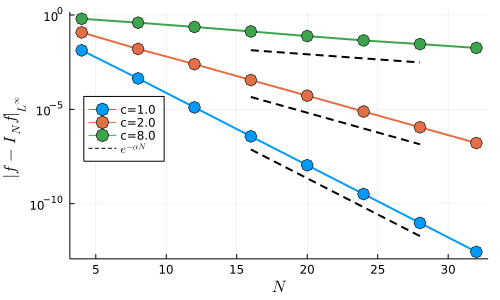

In [9]:
C = [1.0, 2.0, 8.0]
A = asinh.(1.0 ./ C)
G = [ x -> 1/(1+c^2*sin(x)^2) for c in C ]
NN = 4:4:32
xerr = range(-π, stop=π, length=1_000); t = [NN[4], NN[7]]
P = plot( xaxis  = (L"N", ), yaxis  = (:log, L"\| f - I_N f\|_{L^\infty}"), legend = :left, size = (500, 300) )
for (i, (f, c, a)) in enumerate(zip(G, C, A))
    err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf) for N in NN ]
    plot!(P, NN, err, lw=2, m=:o, ms=6, c = i, label = "c=$c")
    plot!(P, t, 0.1*exp.( - a * t), lw=2, ls=:dash, c=:black, label = i == 3 ? L"e^{-\alpha N}" : "")    
end 
P

An entire function:
$$
    f(x) = e^{sin(x)}
$$
then $f$ is *entire*, i.e. analytic in all of $\mathbb{C}$. We therefore expect that 
$$
    \|f - I_N f\|_\infty \leq M_\alpha e^{-\alpha N} \qquad \forall N
$$
Or written differently, 
$$
    \|f - I_N f\|_\infty \lesssim e^{-\alpha_N N}
$$
where $\alpha_N \to \infty$.

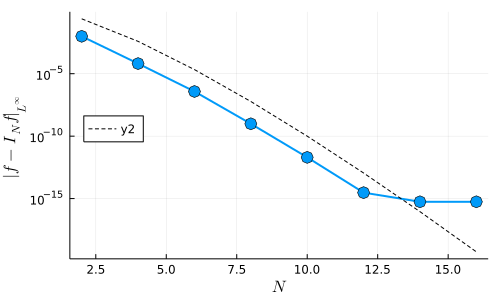

In [10]:
f = x -> cos(sin(x))
NN = 2:2:16
xerr = range(-π, stop=π, length=1_000); t = [NN[4], NN[7]]
P = plot( xaxis  = (L"N", ), yaxis  = (:log, L"\| f - I_N f\|_{L^\infty}"), legend = :left, size = (500, 300) )
err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf) for N in NN ]
plot!(P, NN, err, lw=2, m=:o, ms=6, label = "")
plot!(P, NN, exp.(- NN .* log.(NN)), ls = :dash, c=:black)

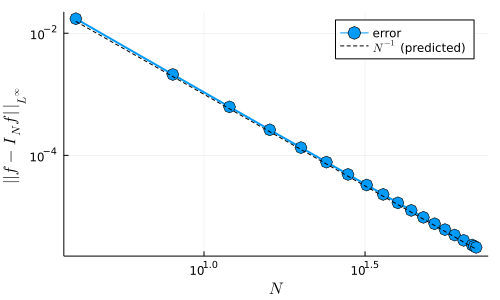

In [16]:
# Approximation of a function that is smooth in (0, 2pi) but not in ℝ
# NN = (2).^(2:9)
NN = [ 4:4:68; [69, 70] ]
f = x -> abs(sin(x))^3  # C^{2,1} => f ∈ C^2  and f'' is Lipschitz
xerr = range(-π, stop=π, length=1_000); t = [NN[4], NN[7]]
P = plot( xaxis  = (:log, L"N", ), yaxis  = (:log, L"\|\| f - I_N f \|\|_{L^\infty}"), legend = :topright, size = (500, 300) )
err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf) for N in NN ]
plot!(P, NN, err, lw=2, m=:o, ms=6, label = "error")
plot!(P, NN, NN.^(-3), ls = :dash, c=:black, label = L"$N^{-1}$ (predicted)")

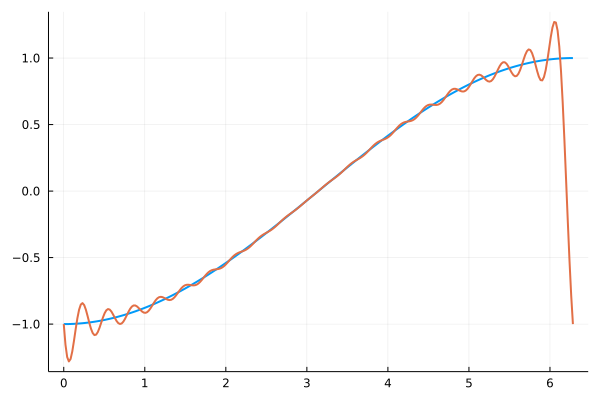

In [11]:
# Approximation of a function that is smooth in (0, 2pi) but not in ℝ
f = x -> sin((x-pi)/2)
xerr = range(0, 2π, length=300); 
plot(xerr, f.(xerr), lw=2, label = "")
plot!(xerr, eval_trig(f, 20, xerr), lw=2, label = "")

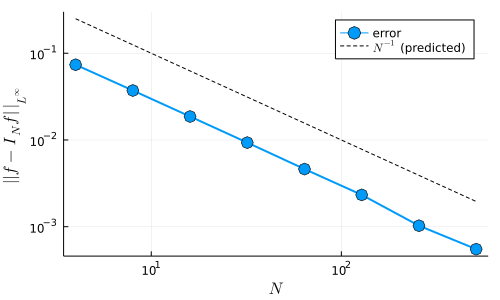

In [12]:
# Approximation of a function that is smooth in (0, 2pi) but not in ℝ
NN = (2).^(2:9)
f = x -> abs(sin((x)/2))
xerr = range(-π, stop=π, length=1_000); t = [NN[4], NN[7]]
P = plot( xaxis  = (:log, L"N", ), yaxis  = (:log, L"\|\| f - I_N f \|\|_{L^\infty}"), legend = :topright, size = (500, 300) )
err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf) for N in NN ]
plot!(P, NN, err, lw=2, m=:o, ms=6, label = "error")
plot!(P, NN, NN.^(-1), ls = :dash, c=:black, label = L"$N^{-1}$ (predicted)")